In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import os, subprocess

print(np.__version__)
print(pd.__version__)
# Numpy version 1.16.5
# Pandas version 0.25.1

1.16.5
0.25.1


In [26]:
class Iris:
    
    # Constructor
    def __init__(self, N):
        # Dataset
        self.df = pd.read_csv("C:/Users/bayes/Documents/Proyectos/iris.csv")
        # Datapoints escogidos al azar del dataset
        self.X = self.generate_points(N)
        
    # Metodo de extracción de N datapoints del dataset    
    def generate_points(self, N):
        
        df = self.df
        X = []
        for i in range(N):
            while True: # Descarte de datapoints no utilizados
                n = random.randrange(0,len(df.index))
                if df.Class[n] != "Iris-virginica":
                    break
            x1, x2 = df.SepalLength[n], df.SepalWidth[n]
            x = np.array([1, x1, x2])
            # Asignación de los valores -1 y 1 a las etiquetas según el tipo de flor
            if df.Class[n] == "Iris-setosa":
                s = -1
            else:
                s = 1
            # Anexar cada datapoint a la lista de salida
            X.append((x,s))

        return X
    
    # Método de gráfica de los datapoints y los pesos
    def plot(self, mispts = None, vec = None, save = False):
        
        fig = plt.figure(figsize=(12,8))
   
        l = np.linspace(4, 7.5)
        # Gráfica de datos de entrenamiento
        for x,s in self.X:
            cols = {-1: 'b', 1: 'r'}
            plt.plot(x[1], x[2], cols[s]+'o')
        # Gráfica de datos de validación
        if mispts:
            for x,s in mispts:
                plt.plot(x[1], x[2], cols[s]+'.')
        # Gráfica del peso en forma de recta
        if vec is not None:
            aa, bb = - vec[1]/vec[2], -vec[0]/vec[2]
            plt.plot(l, aa*l+bb, 'g-', lw=2)
        # Funciones de guardado de imagen y asignación de título
        if save:
            # Título para datos de entrenamiento
            if not mispts:
                plt.title('N = %s' % (str(len(self.X))))
            # Título para datos de validación
            else:
                plt.title('N = %s con %s puntos de prueba' \
                          % (str(len(self.X)), str(len(mispts))))
            plt.savefig('p N%s' % (str(len(self.X))), \
                        dpi=200, bbox_inches = 'tight')
            
    #Método que determina el error (cantidad de puntos mal colocados respecto al total)
    def classification_error(self, vec, pts=None):
        
        if not pts: # Si no se ingresa una lista pts, se utiliza la data de entrenamiento
            pts = self.X
        N = len(pts)
        n_mispts = 0
        for x,s in pts:
            if int(np.sign(vec.T.dot(x))) != s: # Determinación de si un punto está mal ubicado
                n_mispts += 1
        error = n_mispts / float(N) # Cálculo del error
        return error
    # Método que elige un punto aleatorio entre los clasificados incorrectamente
    def choose_miscl_point(self, vec):
         
        pts = self.X
        mispts = []
        
        for x,s in pts: # Creación de lista de los puntos mal ubicados
            if int(np.sign(vec.T.dot(x))) != s:
                mispts.append((x,s))
        
        return mispts[random.randrange(0,len(mispts))] # Punto mal clasificado aleatorio
      
    # Método del perceptrón  
    def pla(self, save = False):
        
        # Inicialización de pesos en [0, 0, 0]
        w = np.zeros(3)
        error = []
        X, N = self.X, len(self.X)
        it = 0
        
        # Iteración hasta que todos los datapoints del entrenamiento se clasifiquen correctamente
        while self.classification_error(w) != 0:
            it += 1
            # Se anexa el error tras cada iteración a una lista
            error.append(self.classification_error(w))
            # Punto mal clasificado al azar
            x, s = self.choose_miscl_point(w)
            # Actualizar pesos según los puntos mal clasificados
            w += s*x
            # Llamado al método de gráfica y funciones de guardado de imagen y asignación de título
            if save:
                self.plot(vec = w)
                plt.title('N = %s, Iteración %s\n' \
                          % (str(N), str(it)))
                plt.savefig('p N%s it%s' % (str(N), str(it)), \
                            dpi = 200, bbox_inches = 'tight')
                
        self.w = w
        # Anexo del error final igual a 0 a la lista de errores
        error.append(0)
        self.error = error

    # Método que emplea la data de validación para determinar el error
    def check_error(self, M, vec):
        # Extracción de la data de entrenamiento
        check_pts = self.generate_points(M)
        return self.classification_error(vec, pts=check_pts) # Determinación del error con la data de validación
    
    # Método que grafica el porcentaje de error según el número de iteraciones
    def plot_error(self):
        it = []
        for i in range(len(self.error)):
            it.append(i)
            self.error[i] *= 100
        plt.plot(it,self.error)
        plt.savefig('Error vs epochs', \
                    dpi = 200, bbox_inches = 'tight')

C:\Users\bayes\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


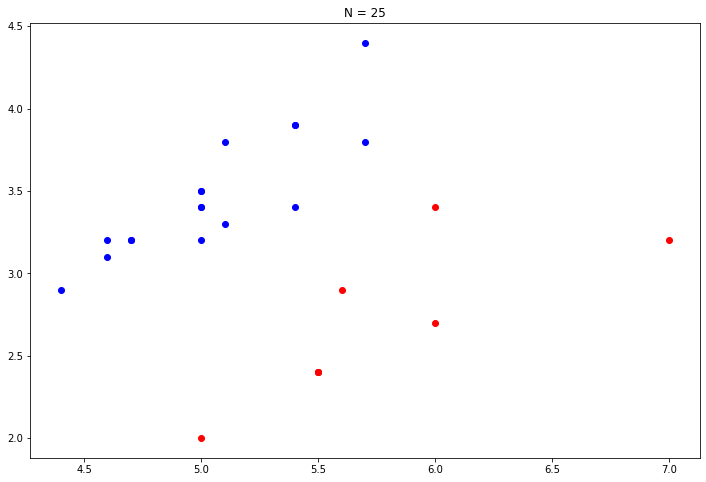

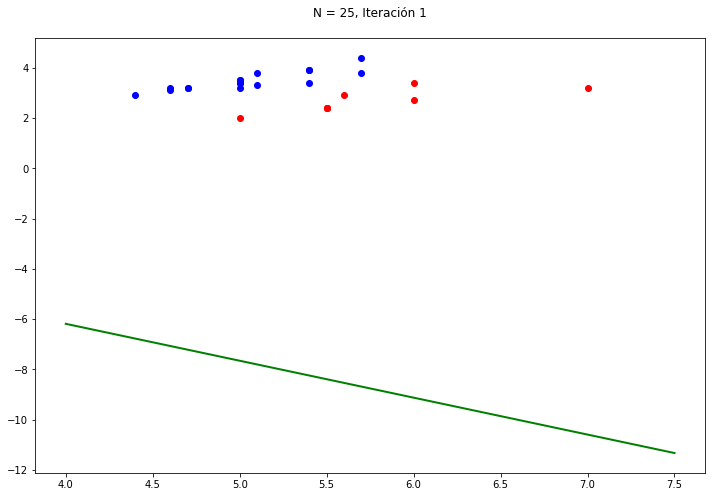

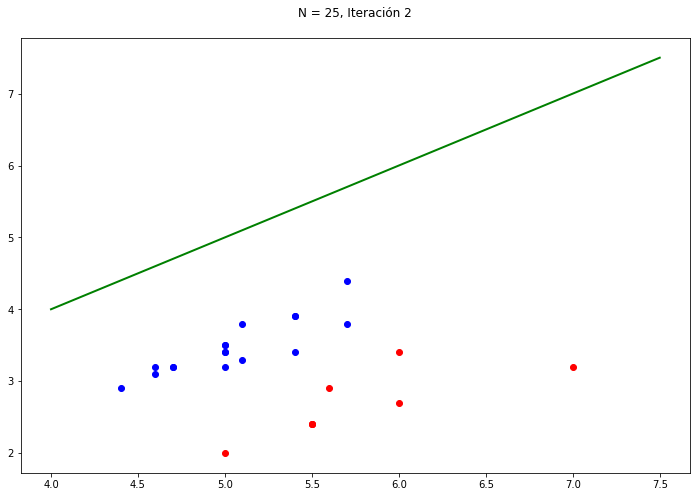

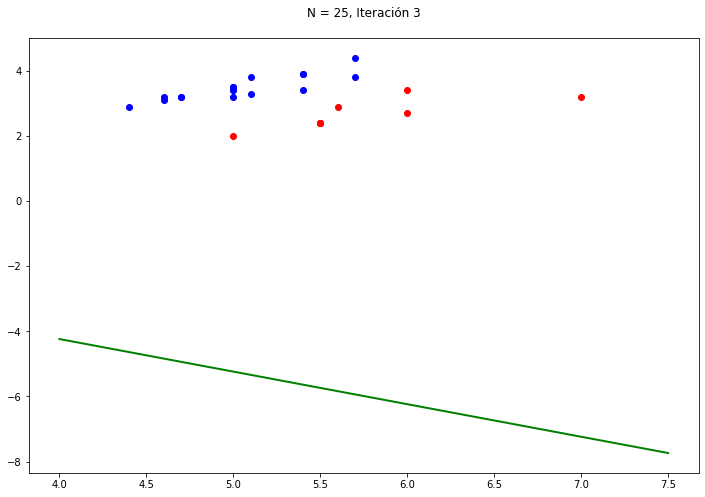

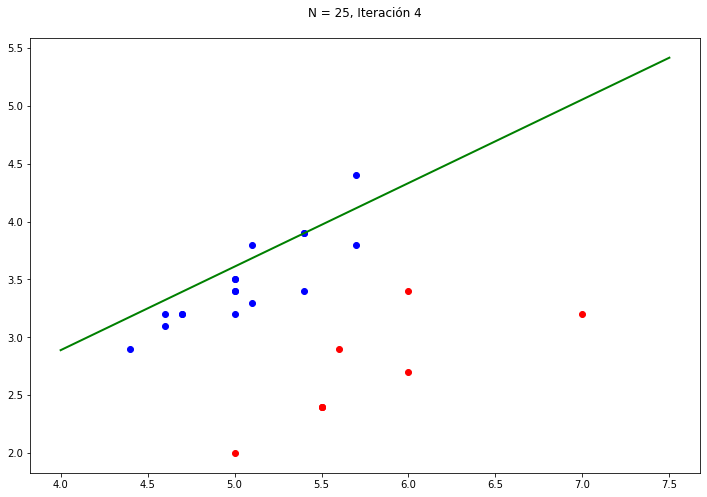

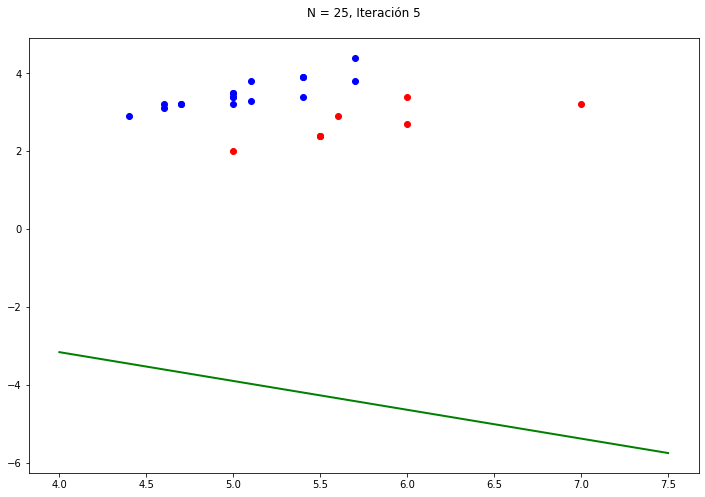

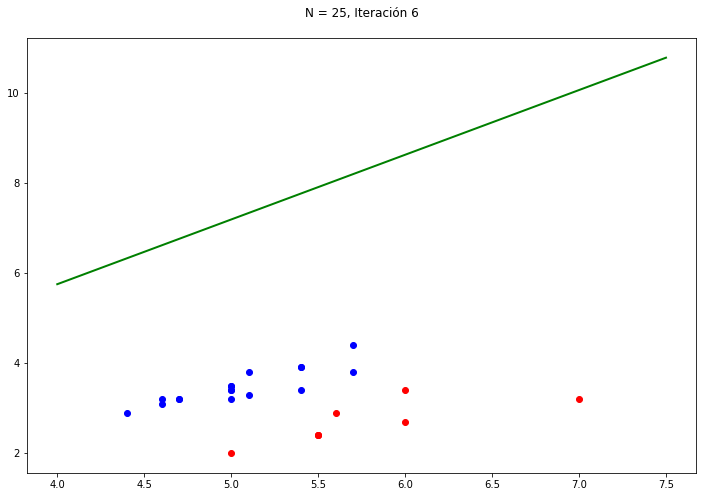

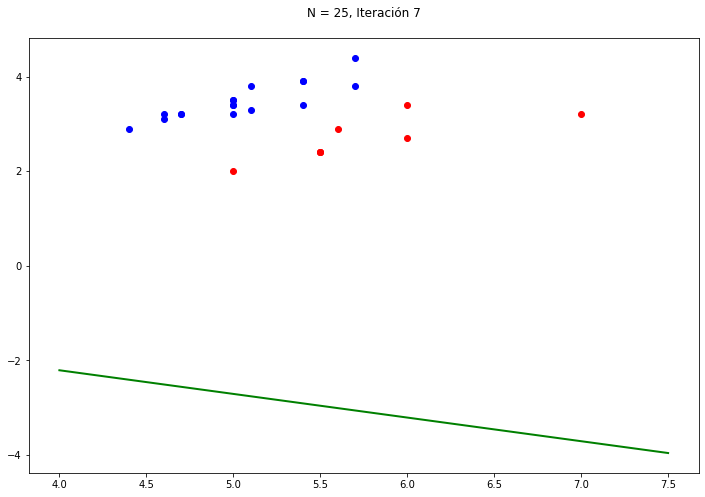

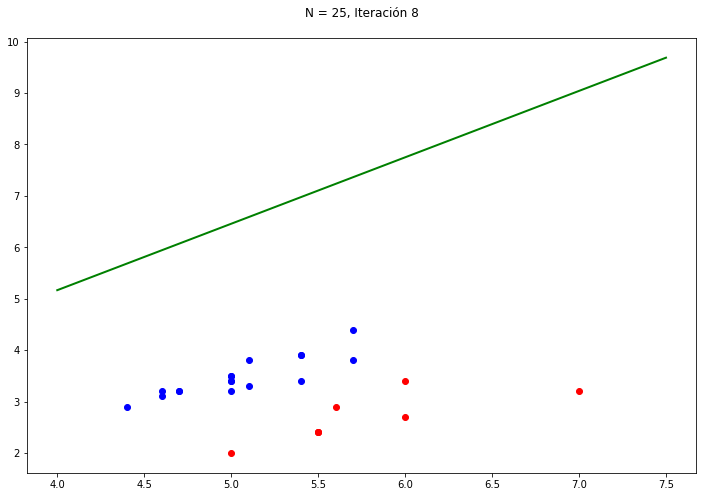

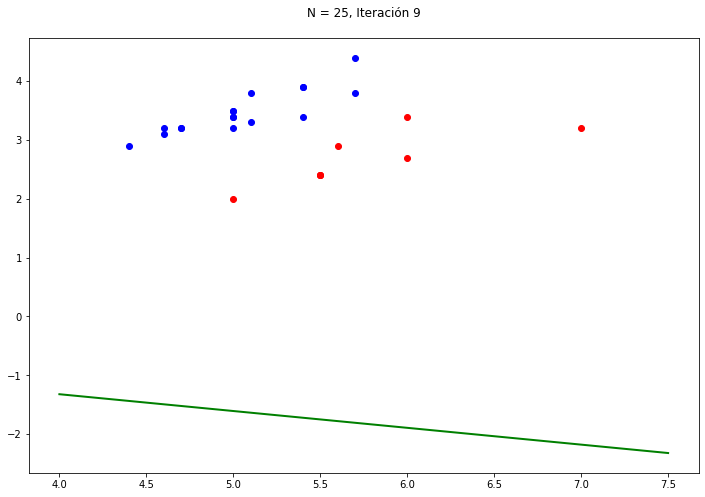

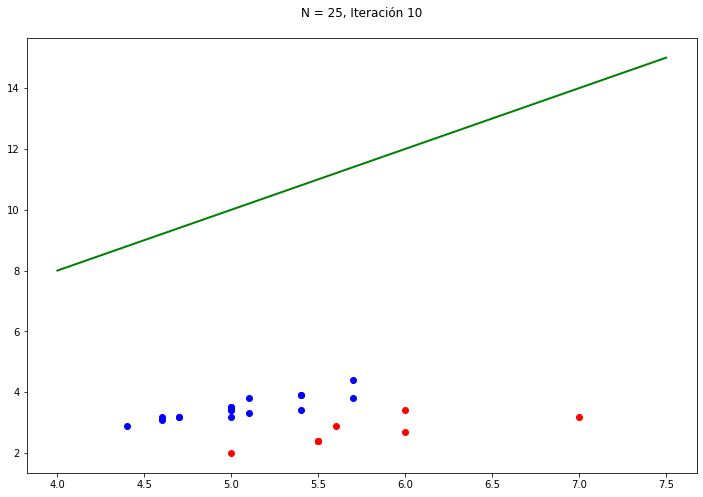

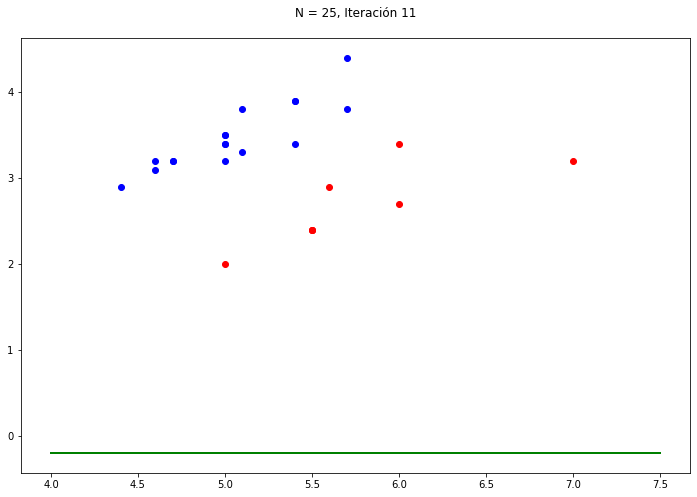

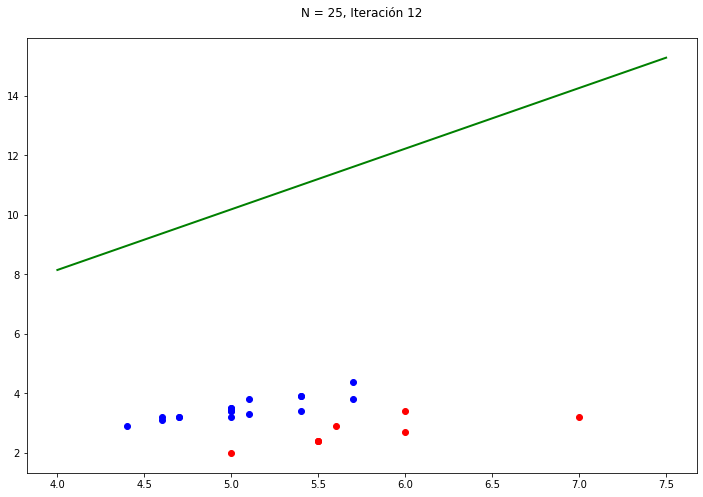

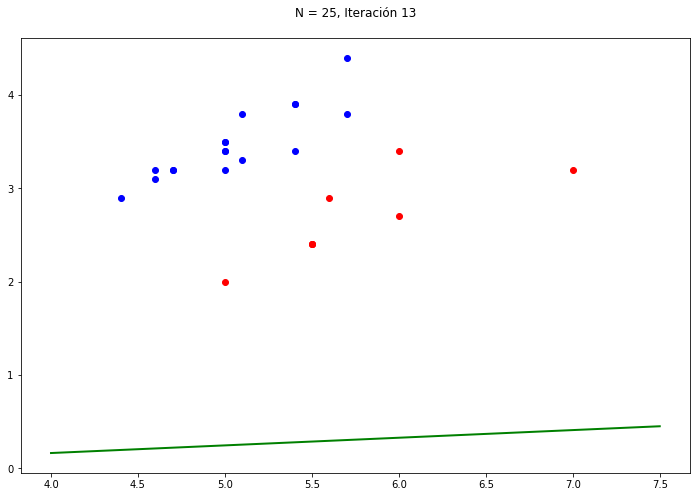

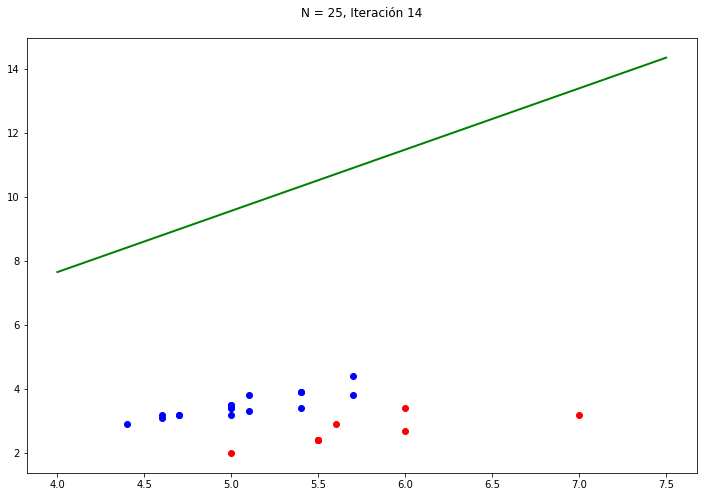

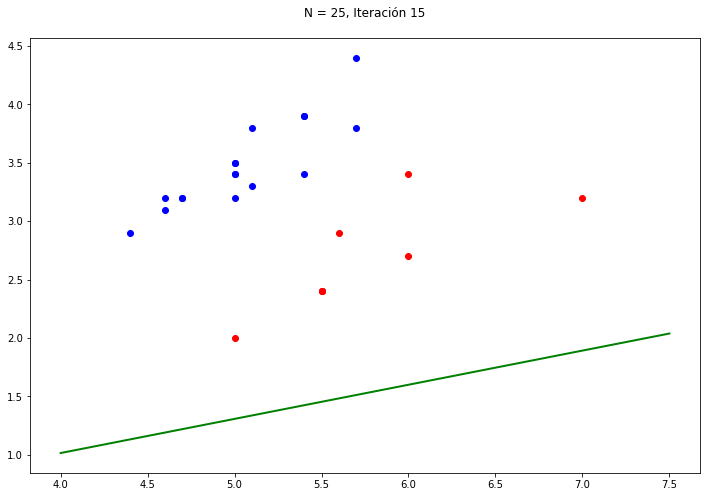

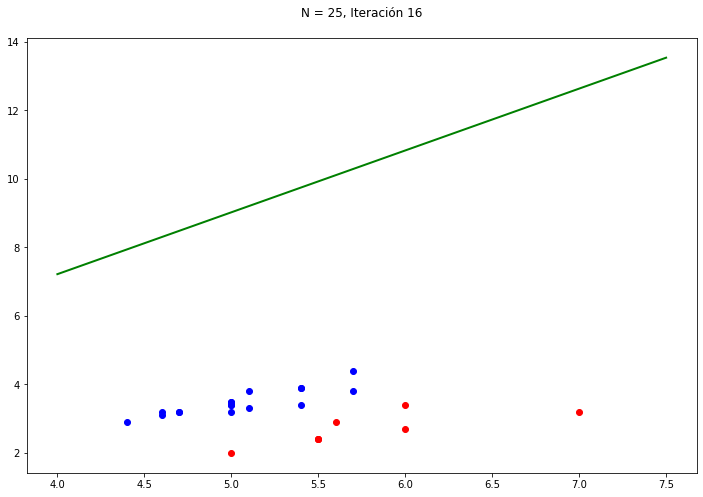

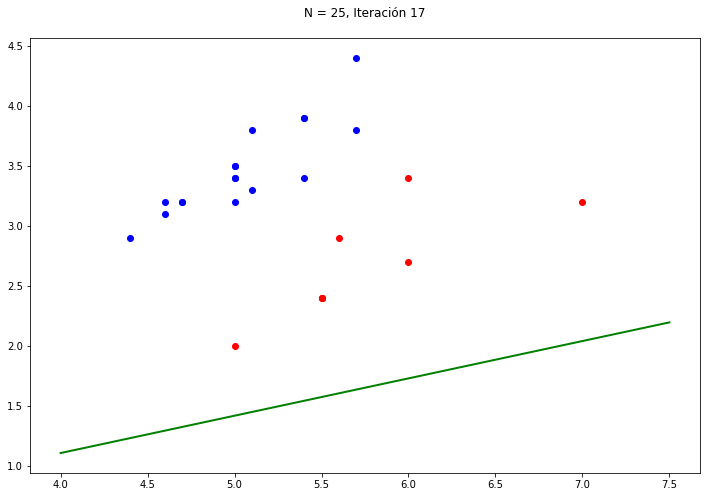

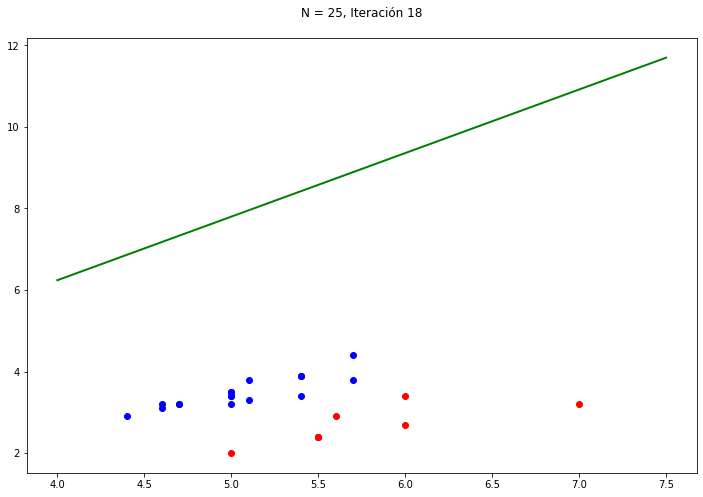

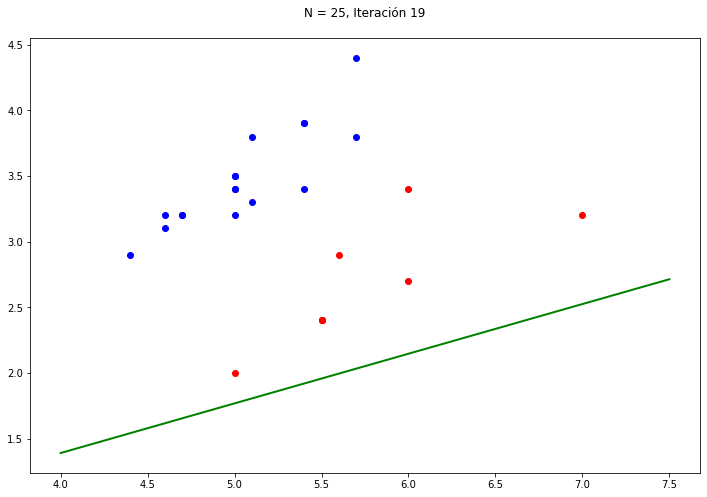

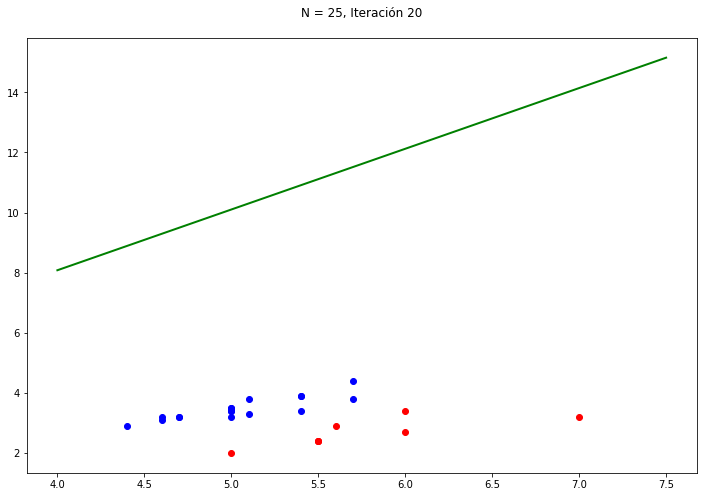

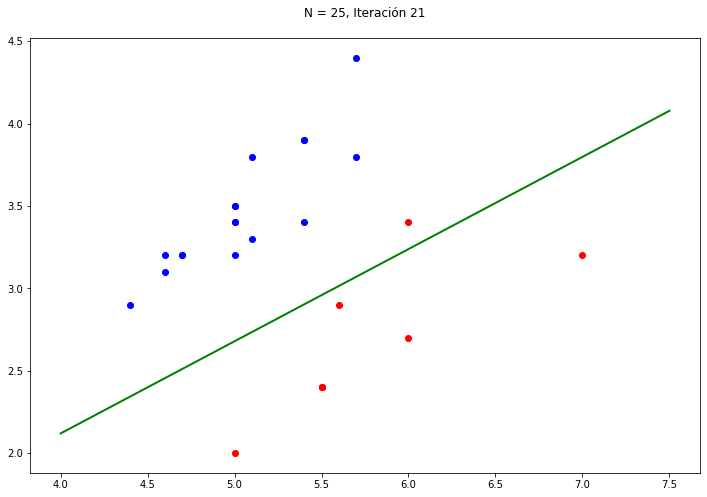

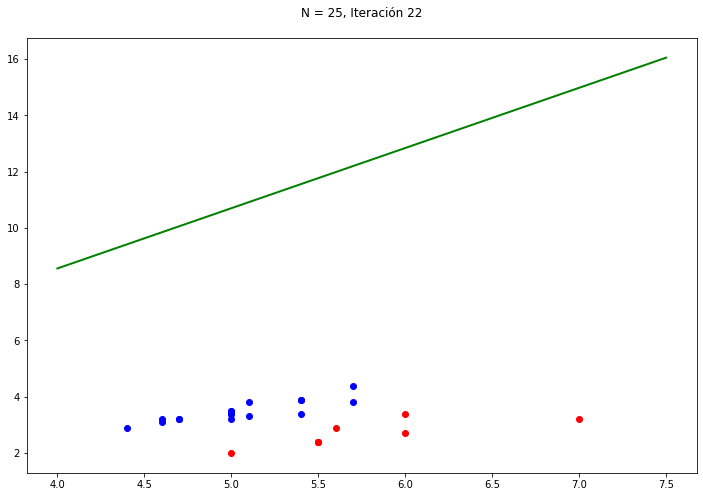

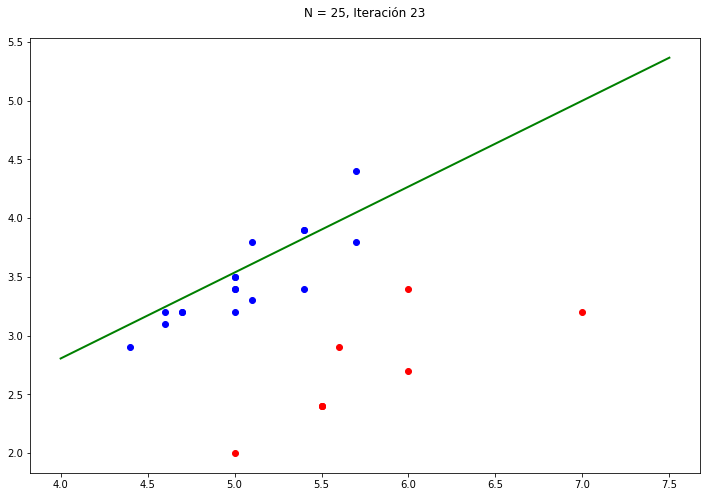

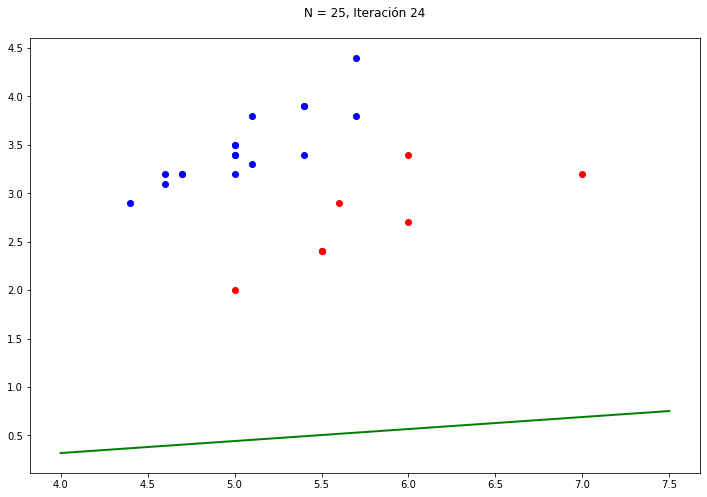

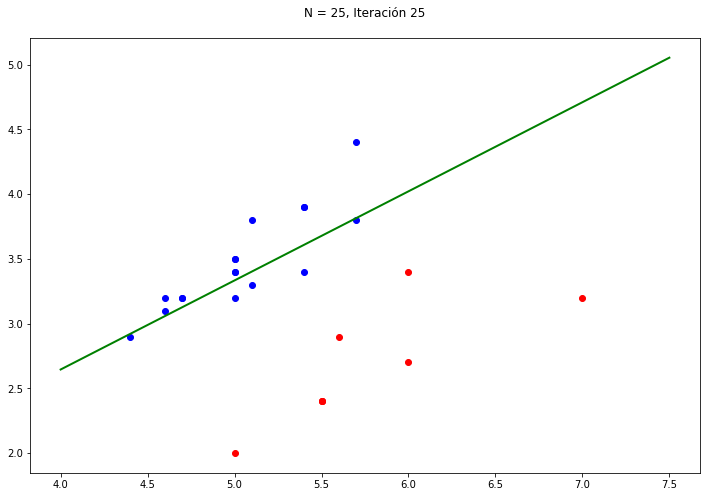

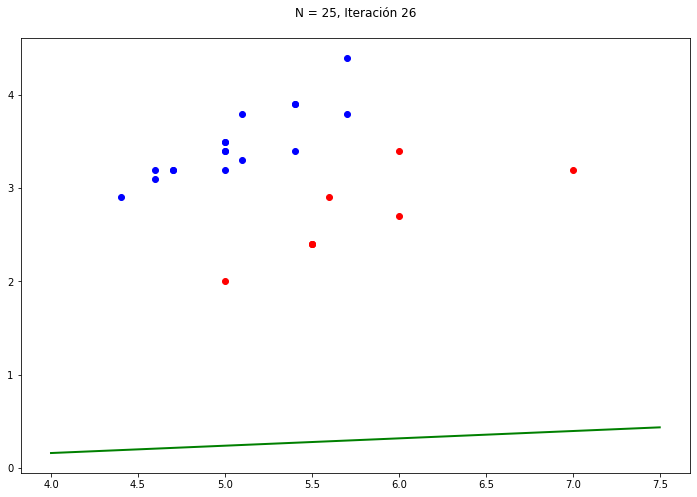

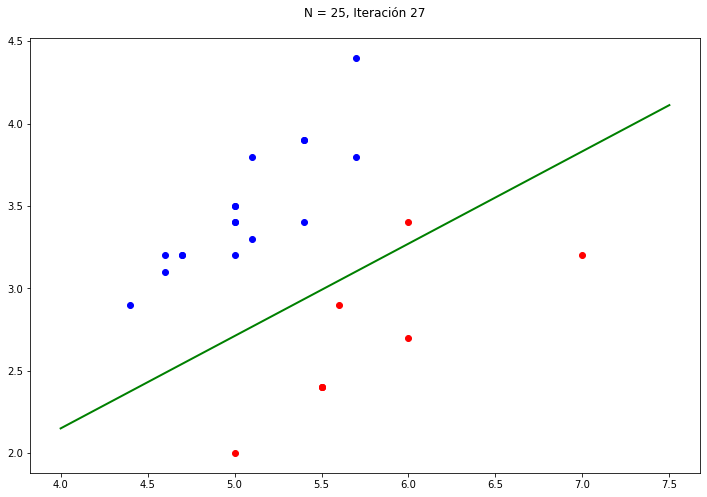

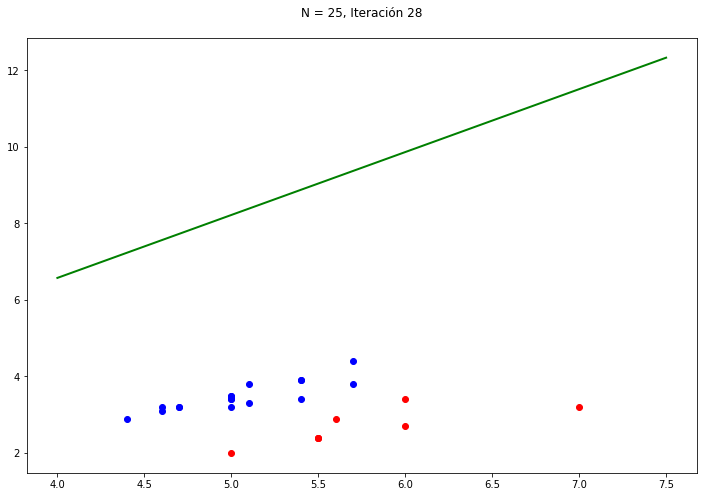

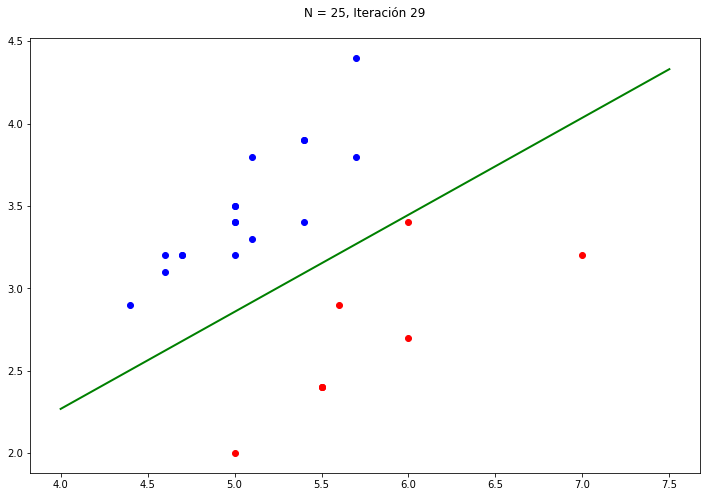

In [31]:
p = Iris(25)
baseDir= r"C:\Users\bayes\Documents\Test"
os.chdir(baseDir)
p.plot(save = True)
p.pla(save = True)

0.009200000000000002

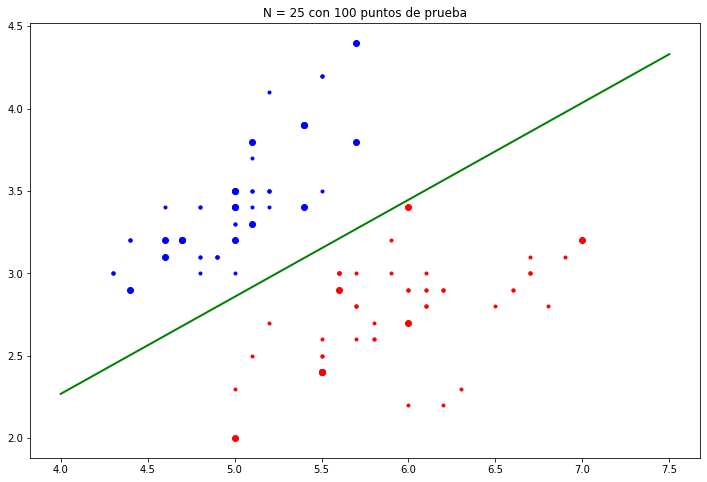

In [32]:
p.plot(p.generate_points(100), p.w, save = True)

err = []
for i in range(100):
    err.append(p.check_error(100,p.w))
np.mean(err)

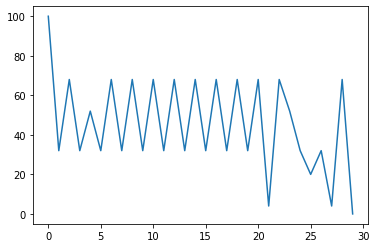

In [33]:
p.plot_error()